In [6]:
from IPython.display import display
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
%config InlineBackend.figure_formats = ['svg']

In [7]:
df = pd.read_csv("ODI-2022.csv", sep=';')
df.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [8]:
# seperate data for different programmes
def index_finder(p_name, df):

    index_list = []

    for index, name in df.items():
        # check if the strings in p_name is part of the "name" in df_programme. To avoid confusing with words containing 
        # the same characters, like 'bioinformatics' and 'cs', a word boundary is added before the string.
        # The re here is used to add the word boundary '\\b'
        if any(len(re.findall('\\b'+e, name)) > 0 for e in p_name):
            index_list.append(index)
    return index_list

### Basic plots

In [9]:
df_programme = df['What programme are you in?'].str.lower()

ai = ['artificial intelligence', 'ai']
cls = ['computational', 'cls']
cs = ['computer', 'cs', 'big data']
bio = ['bio']
ba = ['business analytic', 'ba']
eco = ['eco', 'data science']
qrm = ['qrm', 'quantitative risk management']
eor = ['eor']

ai_index = index_finder(ai, df_programme)
cls_index = index_finder(cls, df_programme)
cs_index = index_finder(cs, df_programme)
bio_index = index_finder(bio, df_programme)
ba_index = index_finder(ba, df_programme)
eco_index = index_finder(eco, df_programme)
qrm_index = index_finder(qrm, df_programme)
eor_index = index_finder(eor, df_programme)

indices_ex = ai_index+cls_index+cs_index+bio_index+ba_index+eco_index+qrm_index+eor_index
indices_t = [ai_index, cs_index, cls_index, bio_index, ba_index, eco_index, qrm_index, eor_index]

print(len(indices_ex))

df_try = df.drop(df.index[indices_ex])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_programme[eor_index])

274


181    masters eor
189            eor
256            eor
266            eor
Name: What programme are you in?, dtype: object

In [10]:
df_gender = df['What is your gender?'].str.lower()

m = ['male']
fm = ['female']
na = ['not willing to answer']
gf = ['gender fluid']
inter = ['intersex']

m_index = index_finder(m, df_gender)
fm_index = index_finder(fm, df_gender)
na_index = index_finder(na, df_gender)
gf_index = index_finder(gf, df_gender)
inter_index = index_finder(inter, df_gender)

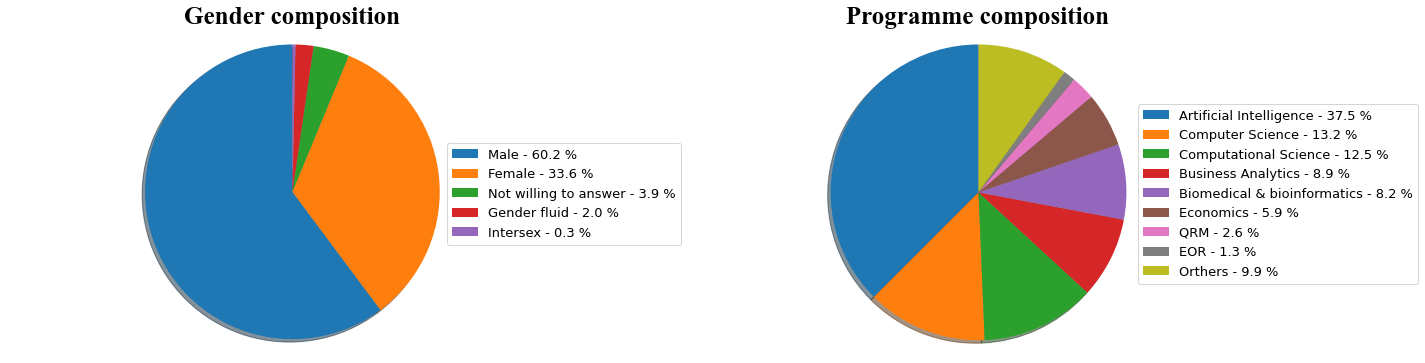

In [11]:
'''
Some basic data structure plot
'''
# set label and size
programme_name = ['Artificial Intelligence', 'Computer Science', 'Computational Science', \
    'Business Analytics', 'Biomedical & bioinformatics', 'Economics', 'QRM', 'EOR', 'Orthers']
size_programme = np.array([len(ai_index), len(cs_index), len(cls_index), len(ba_index), len(bio_index), len(eco_index), \
    len(qrm_index), len(eor_index), 304-len(indices_ex)])
percent_p = 100*size_programme/size_programme.sum()
label_programme = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(programme_name, percent_p)]

gender = ['Male', 'Female', 'Not willing to answer', 'Gender fluid', 'Intersex']
size_gender = np.array([len(m_index), len(fm_index), len(na_index), len(gf_index), len(inter_index)])
percent_g = 100*size_gender/size_gender.sum()
label_gender = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(gender, percent_g)]

plt.rcParams['figure.figsize'] = (22.5,6)

fig1, ax1 = plt.subplots(ncols=2, nrows=1)

ax1[0].pie(size_gender, labels=label_gender, shadow=True, startangle=90, labeldistance=None)
ax1[0].axis('equal') 
ax1[0].set_title('Gender composition', fontname="Times New Roman", fontweight="bold", fontsize=25)
ax1[0].legend(loc="center right", bbox_to_anchor=(0.545,0.5), bbox_transform=plt.gcf().transFigure, fontsize=13)

ax1[1].pie(size_programme, labels=label_programme, shadow=True, startangle=90, labeldistance=None)
ax1[1].axis('equal') 
ax1[1].set_title('Programme composition', fontname="Times New Roman", fontweight="bold", fontsize=25)
ax1[1].legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=13)
plt.show()

## Intermidiate plots

In [12]:
# situation for courses
ml_index = index_finder(['yes'], df['Have you taken a course on machine learning?'].str.lower())
ir_index = index_finder(['1'], df['Have you taken a course on information retrieval?'].str.lower())
st_index = index_finder(['mu'], df['Have you taken a course on statistics?'].str.lower())
db_index = index_finder(['ja'], df['Have you taken a course on databases?'].str.lower())

courses_index = [ml_index, ir_index, st_index, db_index]

ai_c, cs_c, cls_c, ba_c, bio_c, eco_c = [], [], [], [], [], []
programme_courses = [ai_c, cs_c, cls_c, ba_c, bio_c, eco_c]

for course in courses_index:
    for i, programme in enumerate(programme_courses):
        programme.append(list(set(indices_t[i]) & set(course)))

[60.85526315789474, 24.67105263157895, 79.9342105263158, 51.973684210526315]


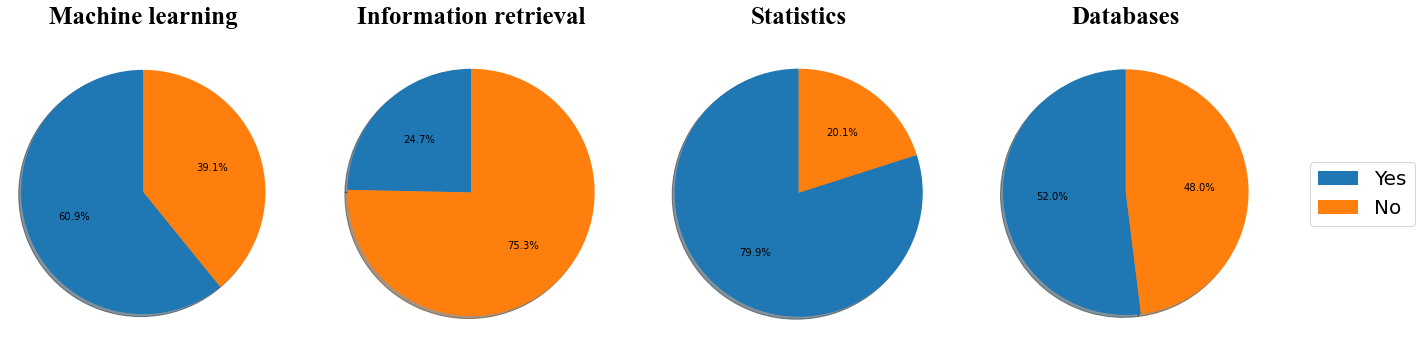

In [13]:
# set label and size
course_name = ['Machine learning', 'Information retrieval', 'Statistics', 'Databases']
y = 'Yes'
n = 'No'

size_course = np.array([len(ml_index), len(ir_index), len(st_index), len(db_index)])

percent_course = list(100 * size_course / 304)

print(percent_course)

plt.rcParams['figure.figsize'] = (22.5,6)

fig2, ax2 = plt.subplots(ncols=4, nrows=1)

for i in range(len(percent_course)):
    ax2[i].pie([percent_course[i], 100-percent_course[i]], labels=[y,n], autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=None)
    ax2[i].axis('equal')
    ax2[i].set_title('{0}'.format(course_name[i]), fontname="Times New Roman", fontweight="bold", fontsize=25)

plt.legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=20)
plt.show()

In [14]:
percent_p_c = [[], [], [], [], [], []]

# calculate the percentage of courses taken for each programme
for i, course in enumerate(courses_index):   # i is the index for course
    for j, programme in enumerate(programme_courses):   # j is the index for programme
        percent_p_c[j].append(len(programme[i])/len(indices_t[j]) * 100)   # calculate the percentage, in %

print(percent_p_c)

[[57.89473684210527, 26.31578947368421, 82.45614035087719, 51.75438596491229], [65.0, 37.5, 77.5, 87.5], [26.31578947368421, 10.526315789473683, 78.94736842105263, 42.10526315789473], [88.0, 0.0, 60.0, 16.0], [100.0, 48.148148148148145, 88.88888888888889, 62.96296296296296], [66.66666666666666, 27.77777777777778, 88.88888888888889, 55.55555555555556]]


### BEDTIME!

In [15]:
# firstly, the garbage data must be cleaned out
df_bed_clean = df.copy()

# find the data with pm
pm_index = []
am_index = []
for index, item in df['Time you went to be Yesterday'].str.lower().items():
    if isinstance(item, str):
        if "pm" in item:
            pm_index.append(index)
        if "am" in item:
            am_index.append(index)

# remove all the text in the bed time column
df_bed_clean['Time you went to be Yesterday'] = df_bed_clean['Time you went to be Yesterday'].str.extract('(\d+)')
df_bed_clean = df_bed_clean[df_bed_clean['Time you went to be Yesterday'].notna()]

# only keep the hour time, and remove all the bedtime larger than 24
df_bed_clean['Time you went to be Yesterday'] = df_bed_clean['Time you went to be Yesterday'].str[:2]
df_bed_clean['Time you went to be Yesterday'] = df_bed_clean['Time you went to be Yesterday'].astype(int)
df_bed_clean = df_bed_clean[df_bed_clean['Time you went to be Yesterday'] <= 24]
# make time unit consistent
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 00] = 24
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 0] = 24
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 12] = 24
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 9] = 21
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 10] = 22
df_bed_clean[df_bed_clean['Time you went to be Yesterday'] == 11] = 23

df_bedtime = df_bed_clean['Time you went to be Yesterday']

# Check the am condition
for i in am_index:
    if df_bedtime[i] == 21:
        df_bedtime[i] = 9
    if df_bedtime[i] == 22:
        df_bedtime[i] = 10
    if df_bedtime[i] == 23:
        df_bedtime[i] = 11
    if df_bedtime[i] == 24:
        df_bedtime[i] = 12

# convert the 12time to 24time
for i in pm_index:
    if df_bedtime[i] <= 12:
        df_bedtime[i] += 12

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
display(df_bedtime)

C:\Users\wangk\AppData\Local\Temp/ipykernel_25932/401309.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bedtime[i] = 9
C:\Users\wangk\AppData\Local\Temp/ipykernel_25932/401309.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bedtime[i] = 12
C:\Users\wangk\AppData\Local\Temp/ipykernel_25932/401309.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bedtime[i] += 12


0      23
3      14
4       7
5      21
6      24
       ..
298     2
299     5
300    21
302    24
303     4
Name: Time you went to be Yesterday, Length: 267, dtype: int32

In [16]:
bedtime = np.zeros(24)
bed_index = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
label_bedtime = ['1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', \
    '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00', ]

for index, time in df_bedtime.apply(int).items():
    bedtime[time-1] += 1
    bed_index[time-1].append(index)

Text(0.5, 1.0, 'Time go to bed yesterday')

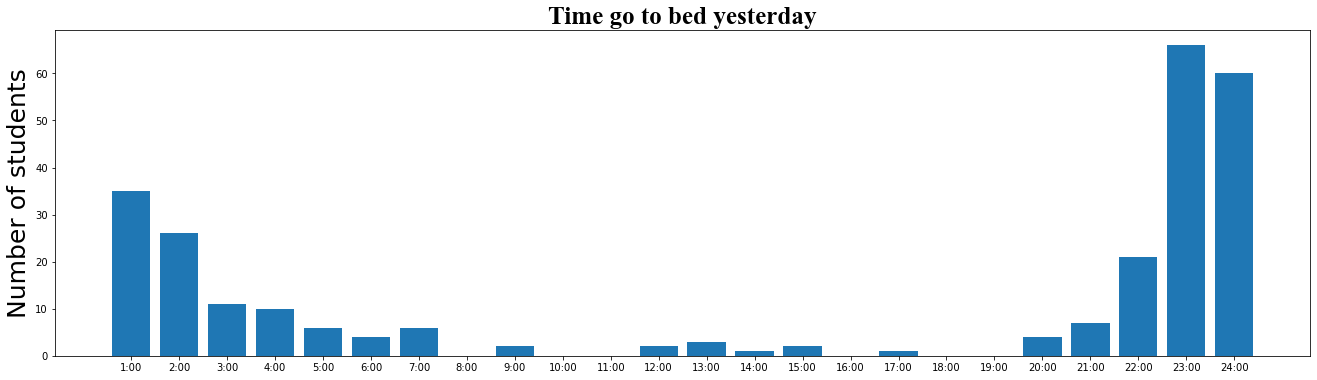

In [17]:
fig3, ax3 = plt.subplots()
plt.rcParams['figure.figsize'] = (16,10)

ax3.bar(label_bedtime, bedtime)
ax3.set_ylabel('Number of students', fontsize=25)
ax3.set_title('Time go to bed yesterday', fontname="Times New Roman", fontweight="bold", fontsize=25)

In [18]:
# bedtime for each course?

ai_bed_index = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
cs_bed_index = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
cls_bed_index = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

ai_bedtime, cs_bedtime, cls_bedtime = np.zeros(24), np.zeros(24), np.zeros(24)

for i, time in enumerate(bed_index):
    ai_bed_index[i].append(list(set(time) & set(ai_index)))
    cs_bed_index[i].append(list(set(time) & set(cs_index)))
    cls_bed_index[i].append(list(set(time) & set(cls_index)))

for i in range(24):
    ai_bedtime[i] = len(ai_bed_index[i][0])
    cs_bedtime[i] = len(cs_bed_index[i][0])
    cls_bedtime[i] = len(cls_bed_index[i][0])


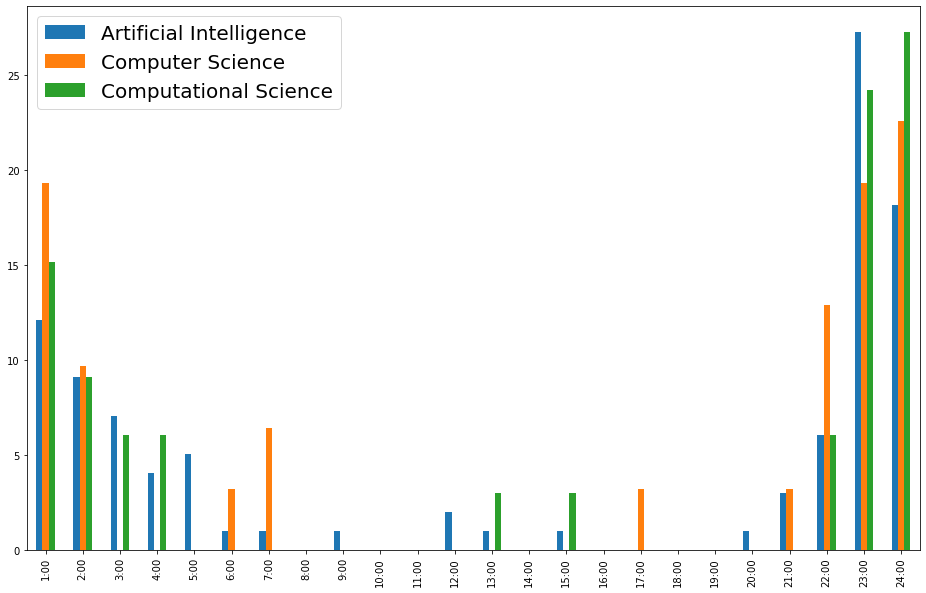

In [19]:
ai_bedtime = 100*ai_bedtime/ai_bedtime.sum()
cs_bedtime = 100*cs_bedtime/cs_bedtime.sum()
cls_bedtime = 100*cls_bedtime/cls_bedtime.sum()

plt.rcParams['figure.figsize'] = (16,10)

df_bedplot = pd.DataFrame({'Artificial Intelligence': ai_bedtime, \
                           'Computer Science': cs_bedtime, \
                           'Computational Science': cls_bedtime}, index = label_bedtime)
df_bedplot.plot.bar()
plt.legend(fontsize=20)

In [20]:
# sleep between 21:00 and 24:00 : Great
# sleep between 24:00 and 3:00 : Good
# sleep after 3:00 : Bad

bed_health = [[20, 21, 22, 23], [0, 1, 2], np.arange(3, 20)]

ai_bed_condition, cs_bed_condition, cls_bed_condition = [[], [], []], [[], [], []], [[], [], []]
bed_condition = [ai_bed_condition, cs_bed_condition, cls_bed_condition]

for i in range(len(bed_health)):
    ai_bed_condition[i] = ai_bedtime[bed_health[i]].sum()
    cs_bed_condition[i] = cs_bedtime[bed_health[i]].sum()
    cls_bed_condition[i] = cls_bedtime[bed_health[i]].sum()


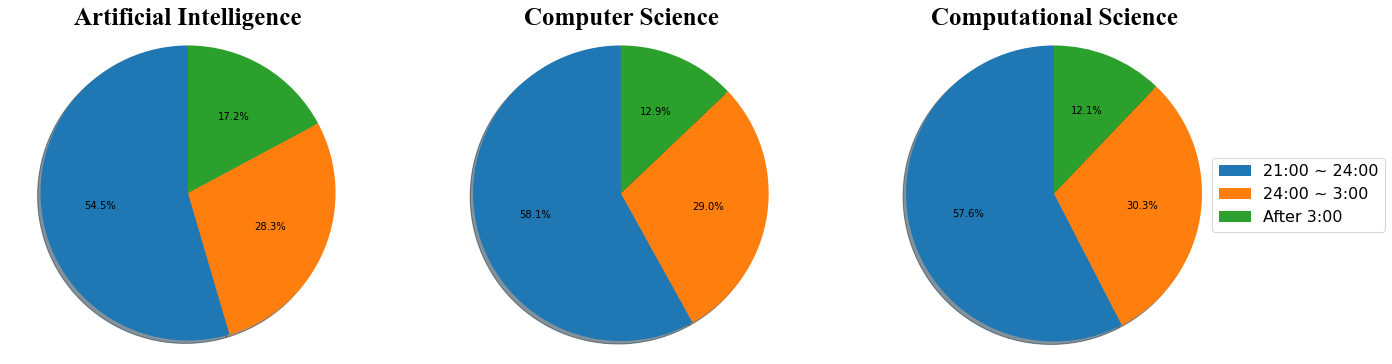

In [21]:
condition_name = ['21:00 ~ 24:00', '24:00 ~ 3:00', 'After 3:00']

plt.rcParams['figure.figsize'] = (22,6)

fig5, ax5 = plt.subplots(ncols=3, nrows=1)

for i in range(len(bed_health)):
    ax5[i].pie(bed_condition[i], labels=condition_name, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=None)
    ax5[i].axis('equal')
    ax5[i].set_title('{0}'.format(programme_name[i]), fontname="Times New Roman", fontweight="bold", fontsize=25)

plt.legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.show()

### Stress level!

In [22]:
df_stress_clean = df.copy()

# remove all the text in the stress-level column
df_stress_clean['What is your stress level (0-100)?'] = df_stress_clean['What is your stress level (0-100)?'].str.extract('(\d+)')
df_stress_clean = df_stress_clean[df_stress_clean['What is your stress level (0-100)?'].notna()]
# adjust the data larger than 100 and smaller than 0
df_stress_clean['What is your stress level (0-100)?'] = df_stress_clean['What is your stress level (0-100)?'].astype(int)
df_stress_clean[df_stress_clean['What is your stress level (0-100)?'] <= 0] = 0
df_stress_clean[df_stress_clean['What is your stress level (0-100)?'] >= 100] = 100

df_stress = df_stress_clean['What is your stress level (0-100)?']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_stress)

0        0
1      100
2        0
3       20
4        2
5       48
6       20
7      100
8       20
9       50
10      60
11      50
12     100
13      65
14      70
15     100
16      98
17      34
18      70
19      15
20      60
21     100
22      10
23      90
24       1
25      70
26      56
27      69
28      79
29      33
30      80
31      10
32     100
33      90
34      70
35      40
36      69
37      69
38      45
39       7
40      33
41      40
42     100
43      70
44      20
45      60
46       0
47      20
48      10
49      50
50       5
51      88
52      60
53      75
54      69
55      34
56      50
57      99
58      99
59      30
60      50
61      20
62      69
63      34
64      40
65       1
66      65
67     100
68      80
69      10
70     100
71      99
72     100
73       1
74      42
75      80
76      50
77     100
78      60
79      50
80      10
81      61
82     100
83      89
84     100
86     100
87      10
88       0
89      80
90     100
91      60

In [23]:
# 0 ~ 25 : very low level
# 25 ~ 50 : low level
# 50 ~ 75 : high level
# 75 ~ 100 : very high level
stress_cum = np.zeros(4)
stress_index = [[], [], [], []]

for index, stress in df_stress.items():
    if stress >= 0 and stress < 25:
        stress_index[0].append(index)
        stress_cum[0] += 1
    elif stress >= 25 and stress < 50:
        stress_index[1].append(index)
        stress_cum[1] += 1
    elif stress >= 50 and stress < 75:
        stress_index[2].append(index)
        stress_cum[2] += 1
    else:
        stress_index[3].append(index)
        stress_cum[3] += 1
stress_cum

array([87., 57., 82., 73.])

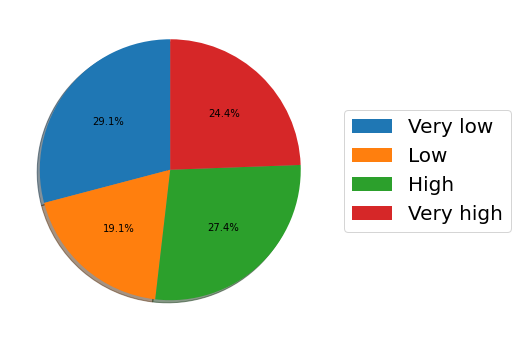

In [24]:
label_stress = ['Very low', 'Low', 'High', 'Very high']

plt.rcParams['figure.figsize'] = (10,6)

fig6, ax6 = plt.subplots()
ax6.pie(stress_cum, labels=label_stress, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=None)
plt.legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=20)

In [25]:
ai_stress_index = [[], [], [], []]
cs_stress_index = [[], [], [], []]
cls_stress_index = [[], [], [], []]

ai_stress, cs_stress, cls_stress = np.zeros(4), np.zeros(4), np.zeros(4)
stress_condition = [ai_stress, cs_stress, cls_stress]

for i, stress_i in enumerate(stress_index):
    ai_stress_index[i].append(list(set(stress_i) & set(ai_index)))
    cs_stress_index[i].append(list(set(stress_i) & set(cs_index)))
    cls_stress_index[i].append(list(set(stress_i) & set(cls_index)))

for i in range(4):
    ai_stress[i] = len(ai_stress_index[i][0])
    cs_stress[i] = len(cs_stress_index[i][0])
    cls_stress[i] = len(cls_stress_index[i][0])

ai_stress = 100*ai_stress/ai_stress.sum()
cs_stress = 100*cs_stress/cs_stress.sum()
cls_stress = 100*cls_stress/cls_stress.sum()

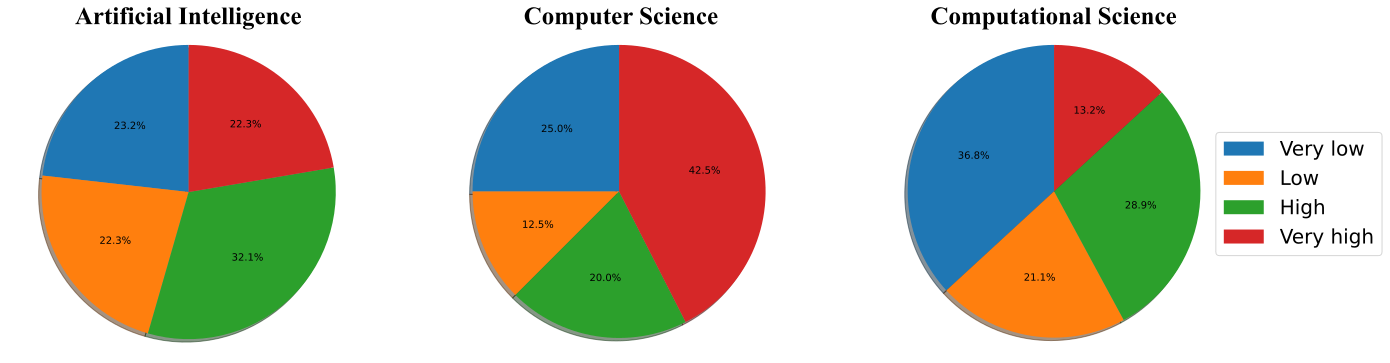

In [32]:
plt.rcParams['figure.figsize'] = (22,6)

fig7, ax7 = plt.subplots(ncols=3, nrows=1)

for i in range(len(stress_condition)):
    ax7[i].pie(stress_condition[i], labels=label_stress, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=None)
    ax7[i].axis('equal')
    ax7[i].set_title('{0}'.format(programme_name[i]), fontname="Times New Roman", fontweight="bold", fontsize=25)

plt.legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=20)
plt.show()

#### Stress level normalization

In [27]:
df_stress_norm = (df_stress - df_stress.mean()) / df_stress.std()
df_stress_norm
df_stress_pos, df_stress_neg = df_stress_norm[df_stress_norm >= 0], df_stress_norm[df_stress_norm < 0]

# find the index of data below and above average stress level
stressn_sep = pd.cut(df_stress_norm, [-10, 0, 10], include_lowest=True)
stressn_index = stressn_sep.groupby(stressn_sep).apply(lambda x: tuple(x.index)).tolist()


In [28]:
df_stress.mean()

48.61204013377927

In [29]:
ai_stressn_index = [[], []]
cs_stressn_index = [[], []]
cls_stressn_index = [[], []]

ai_stressn, cs_stressn, cls_stressn = np.zeros(2), np.zeros(2), np.zeros(2)
stressn_condition = [ai_stressn, cs_stressn, cls_stressn]

for i, stressn in enumerate(stress_index):
    ai_stressn_index[i].append(list(set(stressn) & set(ai_index)))
    cs_stressn_index[i].append(list(set(stressn) & set(cs_index)))
    cls_stressn_index[i].append(list(set(stressn) & set(cls_index)))

for i in range(2):
    ai_stressn[i] = len(ai_stressn_index[i][0])
    cs_stressn[i] = len(cs_stressn_index[i][0])
    cls_stressn[i] = len(cls_stressn_index[i][0])


IndexError: list index out of range

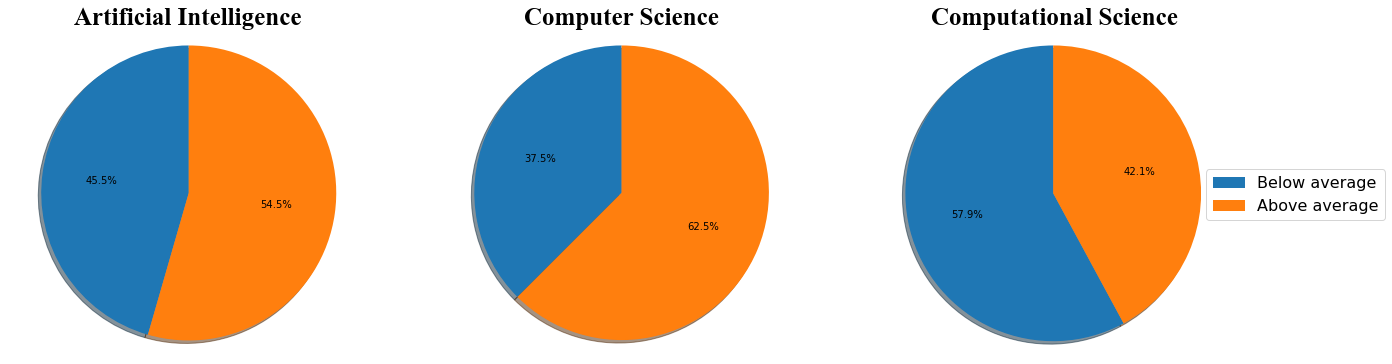

In [ ]:
label_stressn = ['Below average', 'Above average']

plt.rcParams['figure.figsize'] = (22,6)

fig8, ax8 = plt.subplots(ncols=3, nrows=1)

for i in range(len(stressn_condition)):
    ax8[i].pie(stressn_condition[i], labels=label_stressn, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=None)
    ax8[i].axis('equal')
    ax8[i].set_title('{0}'.format(programme_name[i]), fontname="Times New Roman", fontweight="bold", fontsize=25)

plt.legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.show()

### DM competition

In [ ]:
dm_c = 12

df_dmc_clean = df.copy()

# remove all the text in the stress-level column
df_dmc_clean.iloc[:, dm_c] = df_dmc_clean.iloc[:, dm_c].str.extract('(\d+)')
df_dmc_clean = df_dmc_clean[df_dmc_clean.iloc[:, dm_c].notna()]
# adjust the data larger than 100 and smaller than 0
df_dmc_clean.iloc[:, dm_c] = df_dmc_clean.iloc[:, dm_c].astype(int)
df_dmc_clean[df_dmc_clean.iloc[:, dm_c] <= 0] = 0
df_dmc_clean[df_dmc_clean.iloc[:, dm_c] >= 100] = 100

df_dmc = df_dmc_clean.iloc[:, dm_c]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df_dmc)

In [ ]:
# seperate data into 10 segament
dmc_cum = np.zeros(10)
dmc_index = [[], [], [], [], [], [], [], [], [], []]

array([147.,  14.,  27.,  96.,   0.,   0.,   0.,   0.,   0.,   0.])

In [ ]:
# seperate data into 10 segaments
dmc_sep = np.arange(0, 101, 10)
dmc_sep = pd.cut(df_dmc, dmc_sep, include_lowest=True)
# count the frequencies of DM money
dmc_cum = dmc_sep.value_counts(sort=False)

dmc_index = dmc_sep.groupby(dmc_sep).apply(lambda x: tuple(x.index)).tolist()

[  0  10  20  30  40  50  60  70  80  90 100]


<AxesSubplot:>

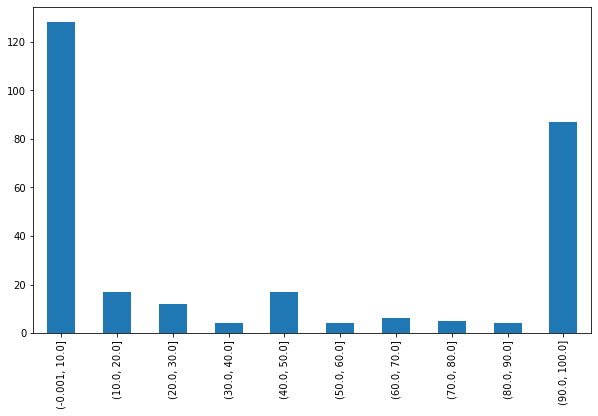

In [ ]:
dmc_cum.plot.bar(x=np.arange(0, 101, 10))

In [ ]:
# dmc for each course?

ai_dmc_index = [[], [], [], [], [], [], [], [], [], []]
cs_dmc_index = [[], [], [], [], [], [], [], [], [], []]
cls_dmc_index = [[], [], [], [], [], [], [], [], [], []]

ai_dmc, cs_dmc, cls_dmc = np.zeros(10), np.zeros(10), np.zeros(10)

for i, dmc in enumerate(dmc_index):
    ai_dmc_index[i].append(list(set(dmc) & set(ai_index)))
    cs_dmc_index[i].append(list(set(dmc) & set(cs_index)))
    cls_dmc_index[i].append(list(set(dmc) & set(cls_index)))

for i in range(10):
    ai_dmc[i] = len(ai_dmc_index[i][0])
    cs_dmc[i] = len(cs_dmc_index[i][0])
    cls_dmc[i] = len(cls_dmc_index[i][0])

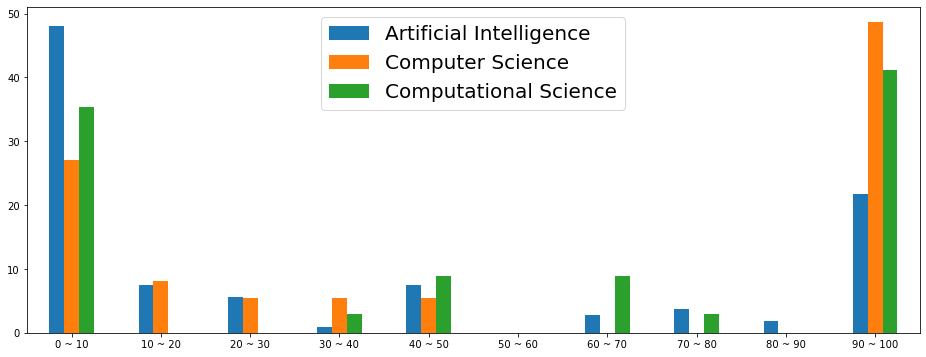

In [ ]:
ai_dmc = 100*ai_dmc/ai_dmc.sum()
cs_dmc = 100*cs_dmc/cs_dmc.sum()
cls_dmc = 100*cls_dmc/cls_dmc.sum()

label_dmc = ['0 ~ 10', '10 ~ 20', '20 ~ 30', '30 ~ 40', '40 ~ 50', '50 ~ 60', '60 ~ 70', '70 ~ 80', '80 ~ 90', '90 ~ 100']

plt.rcParams['figure.figsize'] = (16,6)

df_dmcplot = pd.DataFrame({'Artificial Intelligence': ai_dmc, \
                           'Computer Science': cs_dmc, \
                           'Computational Science': cls_dmc}, index = label_dmc)

df_dmcplot.plot.bar(rot=0)
plt.legend(fontsize=20)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df['Time you went to be Yesterday'])

0                                                  23:00
1                                                     32
2                                                      x
3                                                  14:00
4                                                  07:20
5                                                   2130
6                                                  00:35
7                                                     23
8                                                  23:00
9                                               12 hours
10                                                Banana
11                                                 00:00
12                                                to be?
13                                                 00:00
14                                                 12:00
15                                           4 years ago
16                                                  noon
17                             